# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
#Imported Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split, cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

Using TensorFlow backend.


In [2]:
print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.0.0


In [3]:
#Load data and display it
link='CarPrice_Assignment.csv'
df=pd.read_csv(link)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#drop useless columns
df_1=df.drop('car_ID',axis=1)

In [6]:
#Check important metrics
df_1.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#Check missing values
df_1.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df_2 = pd.get_dummies(df_1, columns=['CarName','symboling','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'], drop_first = True)

In [9]:
df_2.to_numpy()
df_2.shape

(205, 194)

In [10]:
#declare X and y
X=df_2.drop('price',axis=1)
y=df_2['price']

In [11]:
#Split data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)


In [12]:
print(X_train.shape)
print(y_train.shape)

(143, 193)
(143,)


In [44]:
#Define Model
model=models.Sequential()
model.add(layers.Dense(150, activation= 'relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [45]:
#fit data to model
his=model.fit(X_train, y_train,validation_split=0.1,epochs=100)

Train on 128 samples, validate on 15 samples
Epoch 1/100
128/128 [==============================] - 0s 3ms/sample - loss: 212599440.0000 - mae: 12614.5195 - val_loss: 364155968.0000 - val_mae: 15831.8223
Epoch 2/100
128/128 [==============================] - 0s 141us/sample - loss: 180766588.0000 - mae: 11332.0010 - val_loss: 322402272.0000 - val_mae: 14471.4033
Epoch 3/100
128/128 [==============================] - 0s 219us/sample - loss: 147718506.0000 - mae: 9869.0430 - val_loss: 271226816.0000 - val_mae: 12617.4072
Epoch 4/100
128/128 [==============================] - 0s 250us/sample - loss: 112383180.0000 - mae: 7915.8164 - val_loss: 220936912.0000 - val_mae: 10493.1582
Epoch 5/100
128/128 [==============================] - 0s 203us/sample - loss: 81713966.0000 - mae: 6034.2852 - val_loss: 176996128.0000 - val_mae: 8831.0674
Epoch 6/100
128/128 [==============================] - 0s 219us/sample - loss: 59772602.0000 - mae: 4966.1533 - val_loss: 144780800.0000 - val_mae: 8033.7056

128/128 [==============================] - 0s 234us/sample - loss: 19724778.5000 - mae: 3018.0483 - val_loss: 39685796.0000 - val_mae: 4354.2764
Epoch 52/100
128/128 [==============================] - 0s 258us/sample - loss: 19506527.2500 - mae: 3096.8640 - val_loss: 39583668.0000 - val_mae: 4191.6094
Epoch 53/100
128/128 [==============================] - 0s 203us/sample - loss: 19504457.7500 - mae: 3073.9946 - val_loss: 38395844.0000 - val_mae: 4261.5703
Epoch 54/100
128/128 [==============================] - 0s 297us/sample - loss: 18449874.0000 - mae: 3013.5886 - val_loss: 39588616.0000 - val_mae: 3948.8760
Epoch 55/100
128/128 [==============================] - 0s 180us/sample - loss: 19265895.0000 - mae: 3110.4434 - val_loss: 40057508.0000 - val_mae: 3863.5806
Epoch 56/100
128/128 [==============================] - 0s 320us/sample - loss: 18833795.0000 - mae: 2894.1748 - val_loss: 36532316.0000 - val_mae: 4244.7236
Epoch 57/100
128/128 [==============================] - 0s 211us/

In [46]:
#evaluate model
model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 145us/sample - loss: 22718992.1290 - mae: 3153.3188


[22718992.129032258, 3153.3188]

In [47]:
his.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

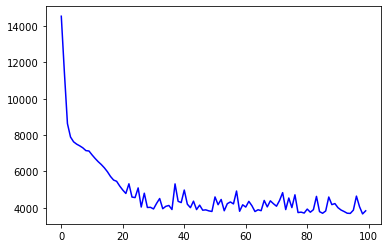

In [43]:
valmae=his.history['val_mae']
epochs=range(100)
plt.plot(epochs,valmae,'b',label='val mae')

NameError: name 'regularizers' is not defined